In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
t = time.time()

print('Importing startred...')

# base libraries
import os
import numpy as np
import pandas as pd
import re
from scipy import stats
from random import randint
from datetime import datetime


# visualization libraries
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
#import missingno as msno
import plotly.express as px


# preprocessing libraries
from sklearn.model_selection import (TimeSeriesSplit,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                    cross_val_score)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder)
from sklearn.svm import SVR,LinearSVR
from sklearn.feature_selection import SelectFromModel


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error)
from sklearn.metrics import make_scorer


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              VotingRegressor,
                              GradientBoostingRegressor,BaggingRegressor)
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import (LGBMRegressor,
                      early_stopping)

!pip install catboost
from catboost import CatBoostRegressor


Importing startred...


In [2]:
HIU18 = pd.read_csv("/content/Health insurance (18 and under).csv", encoding= 'unicode_escape',index_col=False)
print(HIU18.head(3))

HIA18 = pd.read_csv("/content/Health insurance (18 to 64).csv", encoding= 'unicode_escape',index_col=False)
print(HIA18.head(3))


   year  fips  state_fips  county_fips     county_name state_name state_abbr  \
0  2008  1001           1            1  Autauga County    Alabama         AL   
1  2009  1001           1            1  Autauga County    Alabama         AL   
2  2011  1001           1            1  Autauga County    Alabama         AL   

  metro_nonmetro  uninsured  population_18under  
0   Metropolitan       1035               13774  
1   Metropolitan        860               14722  
2   Metropolitan        712               15037  
   year  fips  state_fips  county_fips     county_name state_name state_abbr  \
0  2008  1001           1            1  Autauga County    Alabama         AL   
1  2009  1001           1            1  Autauga County    Alabama         AL   
2  2011  1001           1            1  Autauga County    Alabama         AL   

  metro_nonmetro  uninsured  population_18to64  
0   Metropolitan       4933              31300  
1   Metropolitan       5492              30571  
2   Metropo

In [3]:
# Update the column name
HIU18.rename(columns={'uninsured': 'uninsured_18under'}, inplace=True)
HIA18.rename(columns={'uninsured': 'uninsured_18to64'}, inplace=True)

In [4]:
print(HIU18.columns)
print(HIA18.columns)

Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro', 'uninsured_18under',
       'population_18under'],
      dtype='object')
Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro', 'uninsured_18to64',
       'population_18to64'],
      dtype='object')


In [5]:
merged_df = pd.merge(HIU18, HIA18, on=['year', 'county_name', 'state_name','fips','state_fips','county_fips','state_abbr','metro_nonmetro'])

# Display the merged dataframe
print(merged_df.head(10))

   year  fips  state_fips  county_fips     county_name state_name state_abbr  \
0  2008  1001           1            1  Autauga County    Alabama         AL   
1  2009  1001           1            1  Autauga County    Alabama         AL   
2  2011  1001           1            1  Autauga County    Alabama         AL   
3  2014  1001           1            1  Autauga County    Alabama         AL   
4  2013  1001           1            1  Autauga County    Alabama         AL   
5  2012  1001           1            1  Autauga County    Alabama         AL   
6  2015  1001           1            1  Autauga County    Alabama         AL   
7  2010  1001           1            1  Autauga County    Alabama         AL   
8  2013  1003           1            3  Baldwin County    Alabama         AL   
9  2009  1003           1            3  Baldwin County    Alabama         AL   

  metro_nonmetro  uninsured_18under  population_18under  uninsured_18to64  \
0   Metropolitan               1035       

In [6]:
#Identify the shape of the dataset
merged_df.shape

(25141, 12)

In [7]:
#identify the column name
merged_df.columns

Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro', 'uninsured_18under',
       'population_18under', 'uninsured_18to64', 'population_18to64'],
      dtype='object')

In [8]:
#Calculate the uninsured rate

In [9]:
merged_df['Uninsured_Rate_18under'] = ((merged_df['uninsured_18under'] / merged_df['population_18under']) * 100).round(2)

In [10]:
merged_df['Uninsured_Rate_18to64'] = ((merged_df['uninsured_18to64'] / merged_df['population_18to64']) * 100).round(2)

In [11]:
merged_df

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,uninsured_18under,population_18under,uninsured_18to64,population_18to64,Uninsured_Rate_18under,Uninsured_Rate_18to64
0,2008,1001,1,1,Autauga County,Alabama,AL,Metropolitan,1035,13774,4933,31300,7.51,15.76
1,2009,1001,1,1,Autauga County,Alabama,AL,Metropolitan,860,14722,5492,30571,5.84,17.96
2,2011,1001,1,1,Autauga County,Alabama,AL,Metropolitan,712,15037,6065,33764,4.73,17.96
3,2014,1001,1,1,Autauga County,Alabama,AL,Metropolitan,504,14525,4780,33627,3.47,14.21
4,2013,1001,1,1,Autauga County,Alabama,AL,Metropolitan,573,14638,5845,33539,3.91,17.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25136,2008,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,138,1422,859,4173,9.70,20.58
25137,2013,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,114,1594,761,4115,7.15,18.49
25138,2011,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,136,1624,835,4149,8.37,20.13
25139,2009,56045,56,45,Weston County,Wyoming,WY,Nonmetropolitan,168,1591,858,4078,10.56,21.04


In [12]:
print(merged_df.shape)

(25141, 14)


In [13]:
# % of missing.
for col in merged_df.columns:
    pct_missing = np.mean(merged_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

year - 0%
fips - 0%
state_fips - 0%
county_fips - 0%
county_name - 0%
state_name - 0%
state_abbr - 0%
metro_nonmetro - 0%
uninsured_18under - 0%
population_18under - 0%
uninsured_18to64 - 0%
population_18to64 - 0%
Uninsured_Rate_18under - 0%
Uninsured_Rate_18to64 - 0%


In [14]:
# Get the data types of the columns
column_datatypes = merged_df.dtypes

print(column_datatypes)

year                        int64
fips                        int64
state_fips                  int64
county_fips                 int64
county_name                object
state_name                 object
state_abbr                 object
metro_nonmetro             object
uninsured_18under           int64
population_18under          int64
uninsured_18to64            int64
population_18to64           int64
Uninsured_Rate_18under    float64
Uninsured_Rate_18to64     float64
dtype: object


['year', 'fips', 'state_fips', 'county_fips', 'uninsured_18under', 'population_18under', 'uninsured_18to64', 'population_18to64', 'Uninsured_Rate_18under', 'Uninsured_Rate_18to64']


<Figure size 640x480 with 0 Axes>

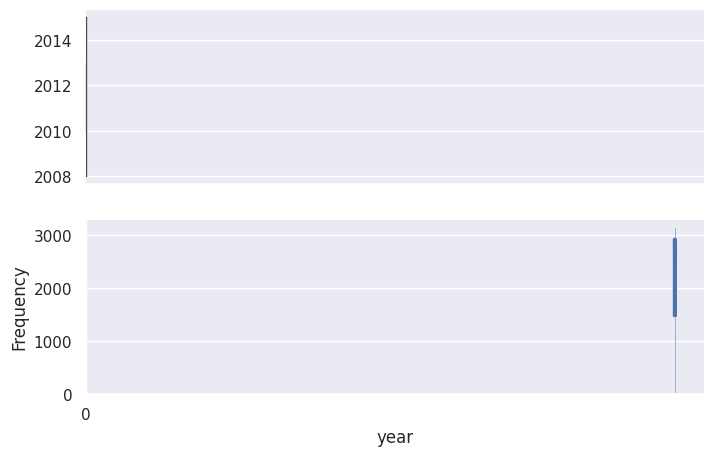

<Figure size 800x500 with 0 Axes>

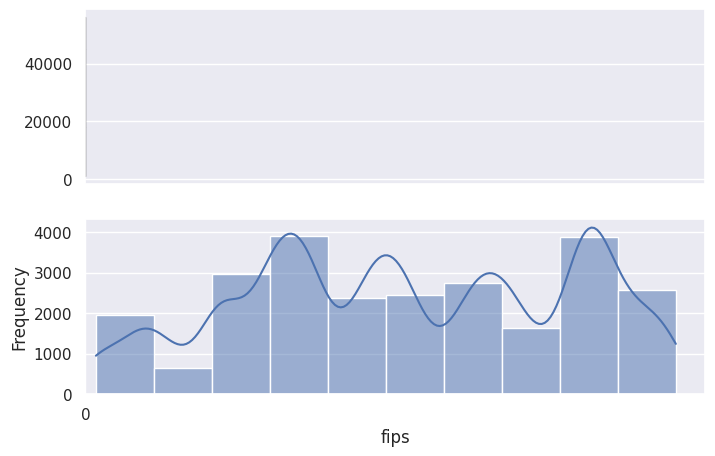

<Figure size 800x500 with 0 Axes>

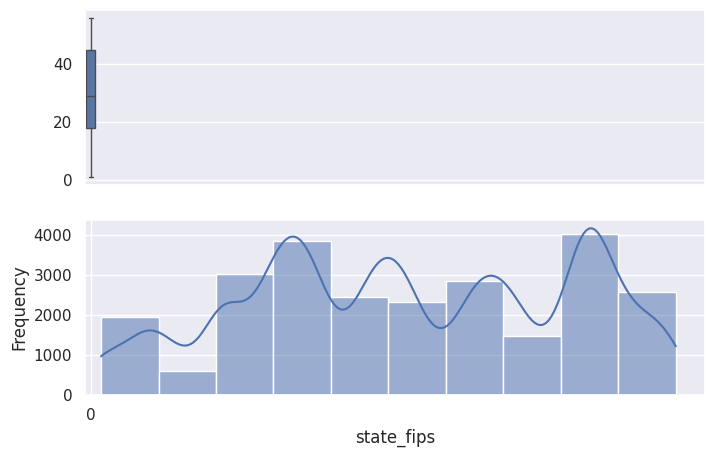

<Figure size 800x500 with 0 Axes>

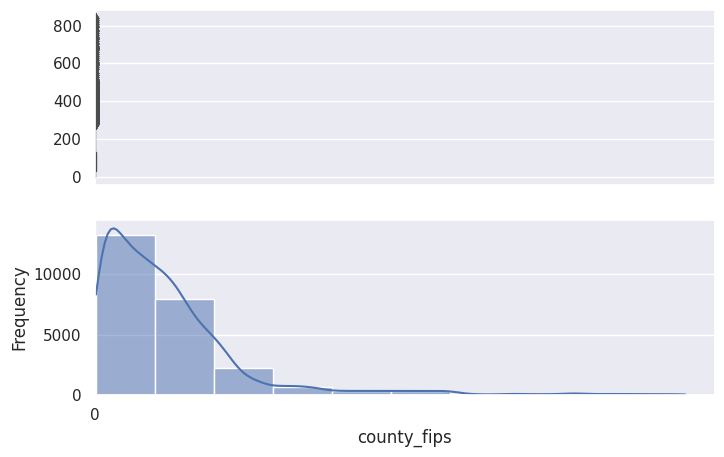

<Figure size 800x500 with 0 Axes>

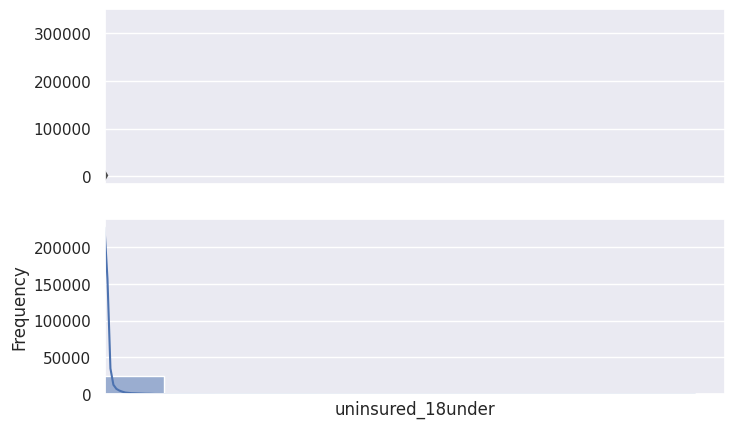

<Figure size 800x500 with 0 Axes>

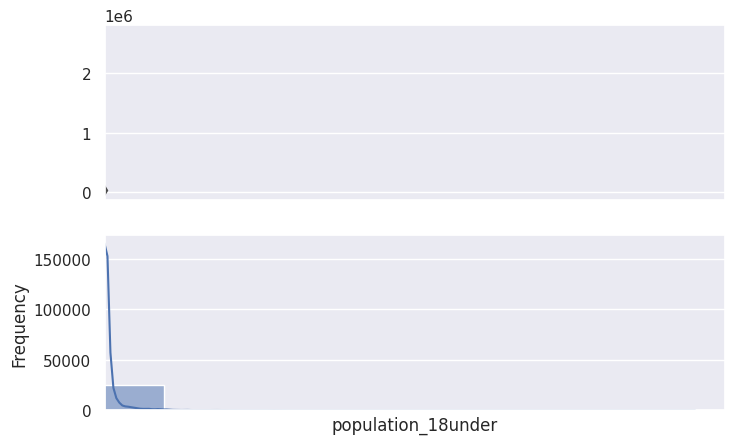

<Figure size 800x500 with 0 Axes>

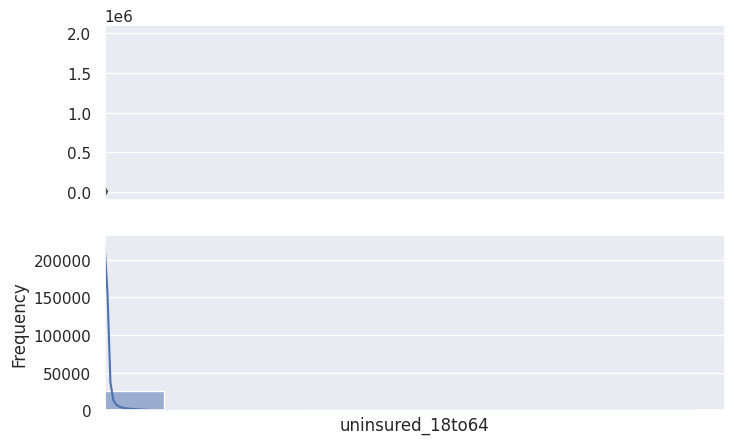

<Figure size 800x500 with 0 Axes>

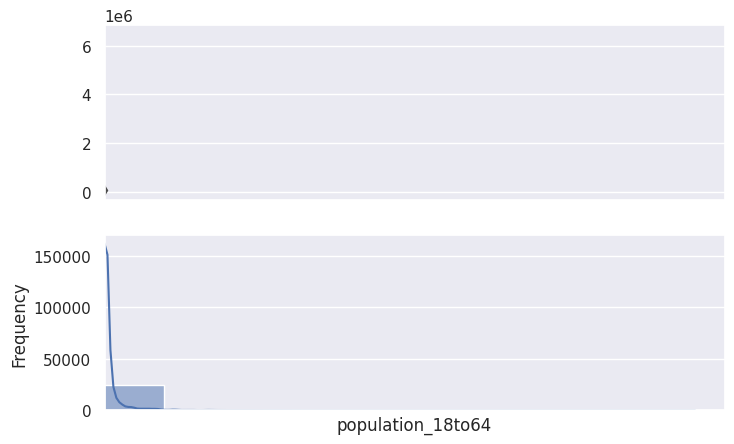

<Figure size 800x500 with 0 Axes>

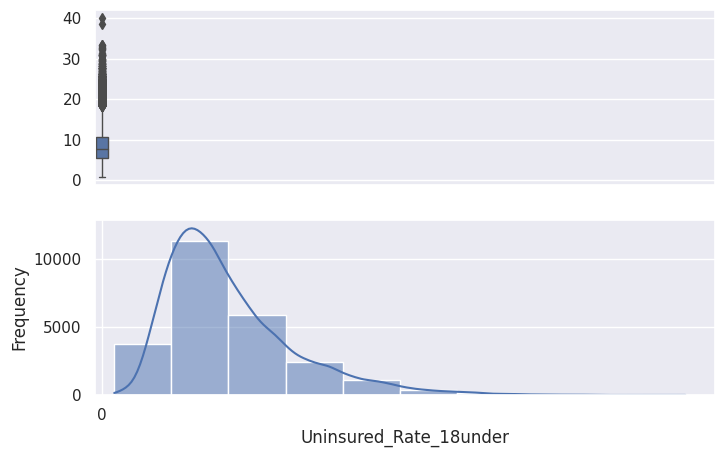

<Figure size 800x500 with 0 Axes>

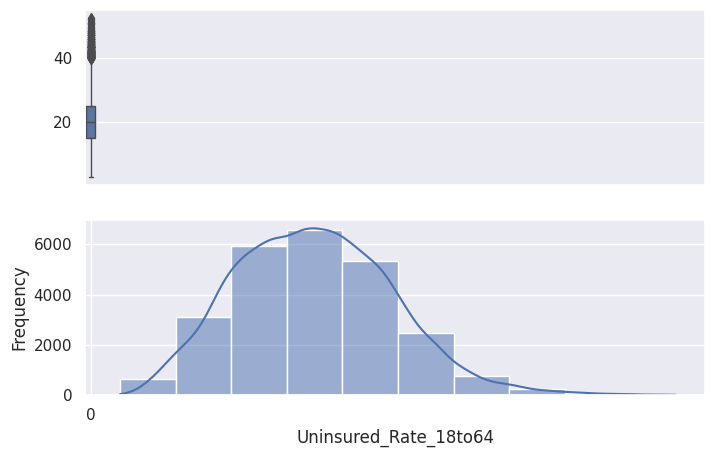

In [15]:
# Select columns with numerical data
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

print(numerical_columns)

for i in numerical_columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(merged_df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(merged_df[i], ax=ax_hist , bins = 10,kde=True)

In [16]:
print(merged_df.describe())#result is numeric because there are no categorial columns

               year          fips    state_fips   county_fips  \
count  25141.000000  25141.000000  25141.000000  25141.000000   
mean    2011.499901  30389.848137     30.286146    103.702001   
std        2.291203  15161.305000     15.143056    107.896622   
min     2008.000000   1001.000000      1.000000      1.000000   
25%     2010.000000  18177.000000     18.000000     35.000000   
50%     2011.000000  29177.000000     29.000000     79.000000   
75%     2013.000000  45083.000000     45.000000    133.000000   
max     2015.000000  56045.000000     56.000000    840.000000   

       uninsured_18under  population_18under  uninsured_18to64  \
count       25141.000000        2.514100e+04      2.514100e+04   
mean         1874.317251        2.437513e+04      1.163419e+04   
std          8049.761602        8.050543e+04      4.898463e+04   
min             0.000000        0.000000e+00      0.000000e+00   
25%           205.000000        2.582000e+03      1.218000e+03   
50%           463.

In [17]:
 #indentifying object type data type for categorical column
count=0
data_continuous=merged_df
for i in merged_df.columns:
#print("The string type features are :", i)
    if data_continuous[i].dtype == 'object':
        data_continuous = data_continuous.drop([i], axis = 1)
        count=count+1
        print("The string type features are :"+ i)
        print("Count :",count)#will print the number of categorical columns
        print(i)

The string type features are :county_name
Count : 1
county_name
The string type features are :state_name
Count : 2
state_name
The string type features are :state_abbr
Count : 3
state_abbr
The string type features are :metro_nonmetro
Count : 4
metro_nonmetro


In [18]:
data_continuous

,year,fips,state_fips,county_fips,uninsured_18under,population_18under,uninsured_18to64,population_18to64,Uninsured_Rate_18under,Uninsured_Rate_18to64
0,2008,1001,1,1,1035,13774,4933,31300,7.51,15.76
1,2009,1001,1,1,860,14722,5492,30571,5.84,17.96
2,2011,1001,1,1,712,15037,6065,33764,4.73,17.96
3,2014,1001,1,1,504,14525,4780,33627,3.47,14.21
4,2013,1001,1,1,573,14638,5845,33539,3.91,17.43
...,...,...,...,...,...,...,...,...,...,...
25136,2008,56045,56,45,138,1422,859,4173,9.70,20.58
25137,2013,56045,56,45,114,1594,761,4115,7.15,18.49
25138,2011,56045,56,45,136,1624,835,4149,8.37,20.13
25139,2009,56045,56,45,168,1591,858,4078,10.56,21.04


In [19]:
# FINDING UNIQUE VALUE FOR CATEGORIAL COLUMNS
for i in ['county_name','state_name','state_abbr','metro_nonmetro']:#,'Day','Month','Year']:
    print(f'{i}: {merged_df[i].nunique()}')

county_name: 1881
state_name: 51
state_abbr: 51
metro_nonmetro: 2


In [20]:
data_categorical=merged_df[['county_name','state_name','state_abbr','metro_nonmetro']]
data_categorical

,county_name,state_name,state_abbr,metro_nonmetro
0,Autauga County,Alabama,AL,Metropolitan
1,Autauga County,Alabama,AL,Metropolitan
2,Autauga County,Alabama,AL,Metropolitan
3,Autauga County,Alabama,AL,Metropolitan
4,Autauga County,Alabama,AL,Metropolitan
...,...,...,...,...
25136,Weston County,Wyoming,WY,Nonmetropolitan
25137,Weston County,Wyoming,WY,Nonmetropolitan
25138,Weston County,Wyoming,WY,Nonmetropolitan
25139,Weston County,Wyoming,WY,Nonmetropolitan


In [21]:
le=LabelEncoder()
for col_i in data_categorical:
    data_categorical[col_i]=le.fit_transform(data_categorical[col_i])
    data_categorical

In [22]:
data_categorical

,county_name,state_name,state_abbr,metro_nonmetro
0,82,0,1,0
1,82,0,1,0
2,82,0,1,0
3,82,0,1,0
4,82,0,1,0
...,...,...,...,...
25136,1802,50,50,1
25137,1802,50,50,1
25138,1802,50,50,1
25139,1802,50,50,1


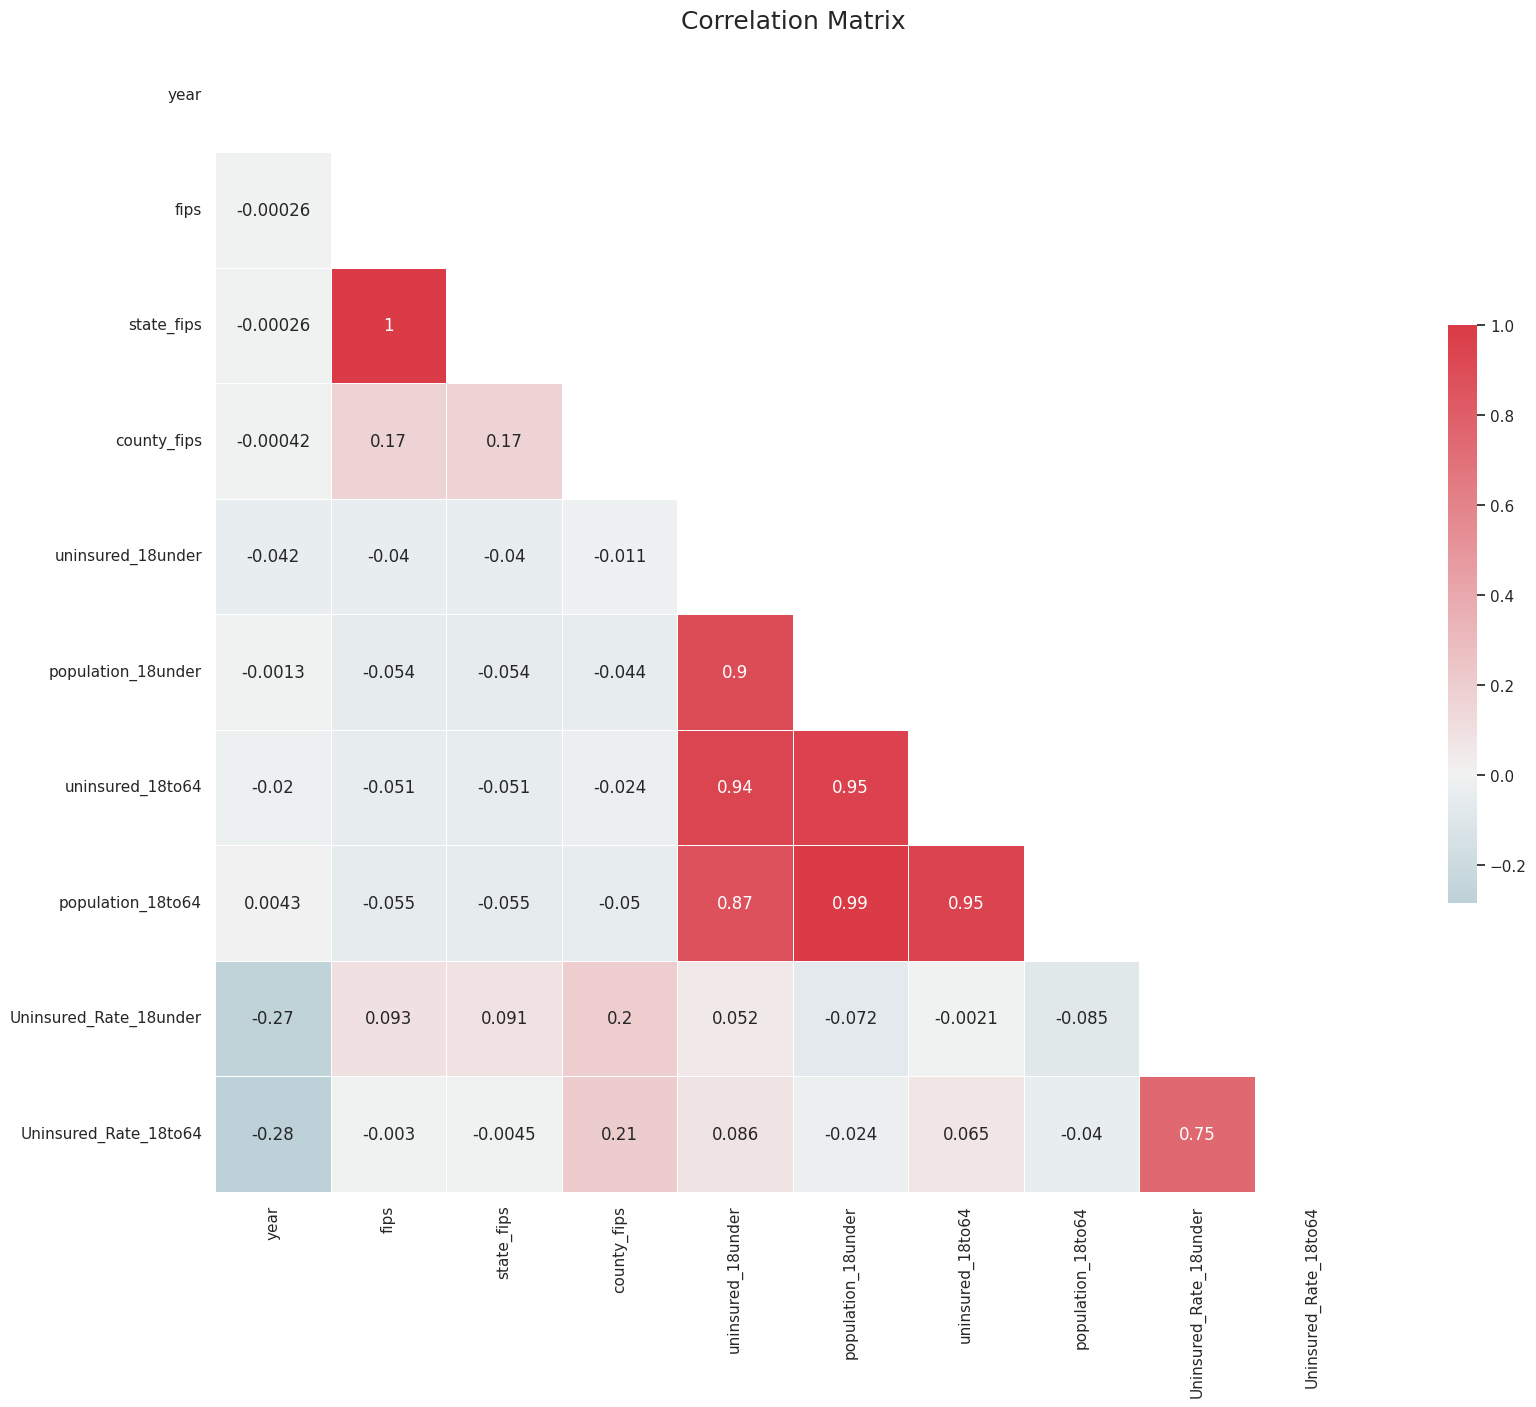

In [23]:
##Statistical analysis and correlations
sns.set(style="white")

corr = merged_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [24]:
df = pd.concat([data_categorical,data_continuous] , axis=1)

In [25]:
df

,county_name,state_name,state_abbr,metro_nonmetro,year,fips,state_fips,county_fips,uninsured_18under,population_18under,uninsured_18to64,population_18to64,Uninsured_Rate_18under,Uninsured_Rate_18to64
0,82,0,1,0,2008,1001,1,1,1035,13774,4933,31300,7.51,15.76
1,82,0,1,0,2009,1001,1,1,860,14722,5492,30571,5.84,17.96
2,82,0,1,0,2011,1001,1,1,712,15037,6065,33764,4.73,17.96
3,82,0,1,0,2014,1001,1,1,504,14525,4780,33627,3.47,14.21
4,82,0,1,0,2013,1001,1,1,573,14638,5845,33539,3.91,17.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25136,1802,50,50,1,2008,56045,56,45,138,1422,859,4173,9.70,20.58
25137,1802,50,50,1,2013,56045,56,45,114,1594,761,4115,7.15,18.49
25138,1802,50,50,1,2011,56045,56,45,136,1624,835,4149,8.37,20.13
25139,1802,50,50,1,2009,56045,56,45,168,1591,858,4078,10.56,21.04


### EXPLORATORY DATA ANALYSIS(EDA)

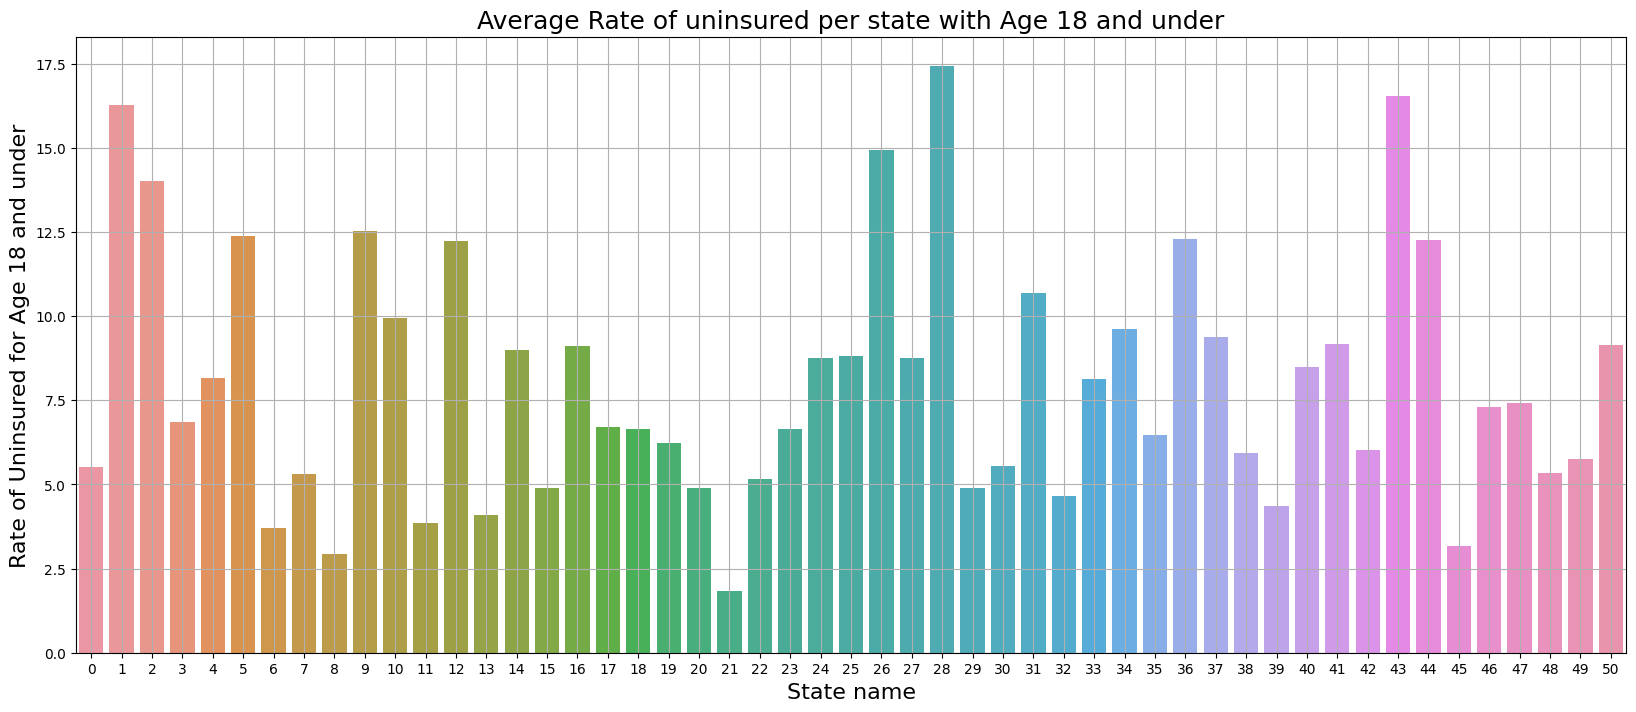

In [26]:
uninsured_state = df['Uninsured_Rate_18under'].groupby(df['state_name']).mean()
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.barplot(x=uninsured_state.index,y=uninsured_state.values)
plt.grid()
plt.title('Average Rate of uninsured per state with Age 18 and under', fontsize=18)
plt.ylabel('Rate of Uninsured for Age 18 and under', fontsize=16)
plt.xlabel('State name', fontsize=16)
plt.show()

In [27]:
merged_df['state_name'].unique()


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

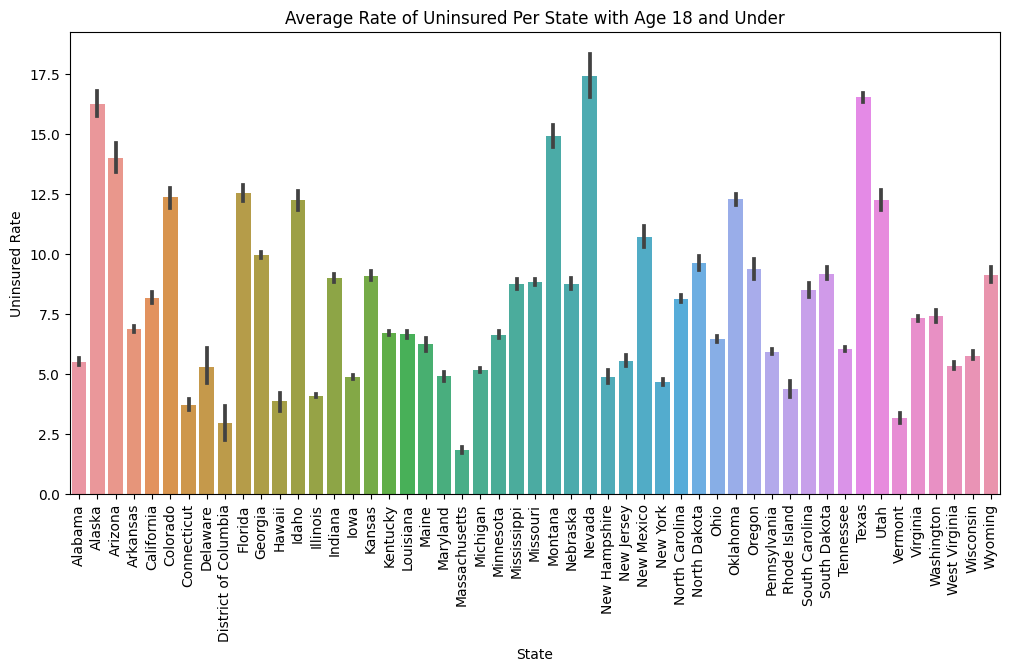

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='state_name', y='Uninsured_Rate_18under')
plt.title('Average Rate of Uninsured Per State with Age 18 and Under')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)
plt.show()

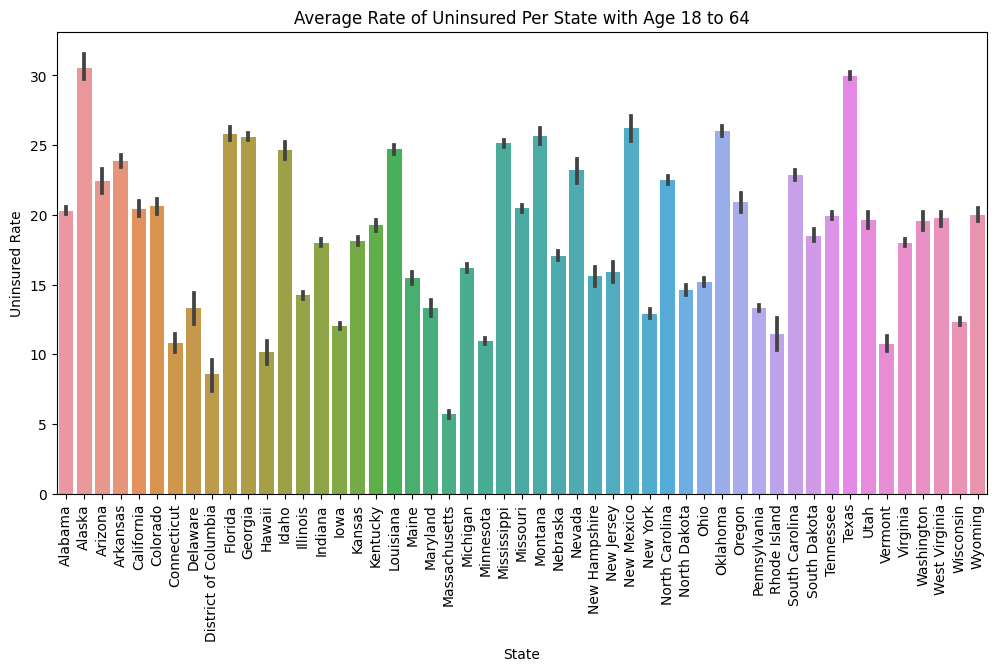

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='state_name', y='Uninsured_Rate_18to64')
plt.title('Average Rate of Uninsured Per State with Age 18 to 64')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)
plt.show()

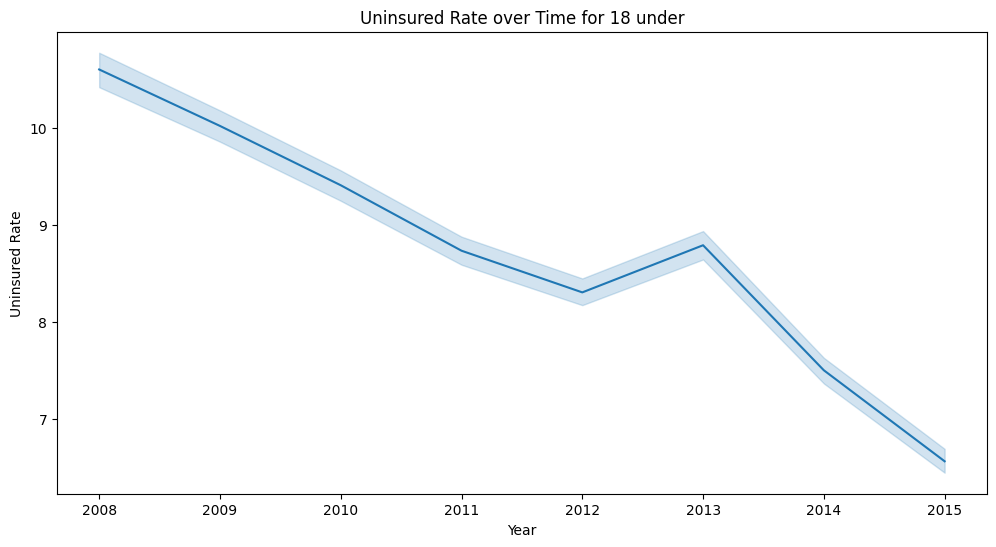

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='Uninsured_Rate_18under')
plt.title('Uninsured Rate over Time for 18 under')
plt.xlabel('Year')
plt.ylabel('Uninsured Rate')
plt.show()

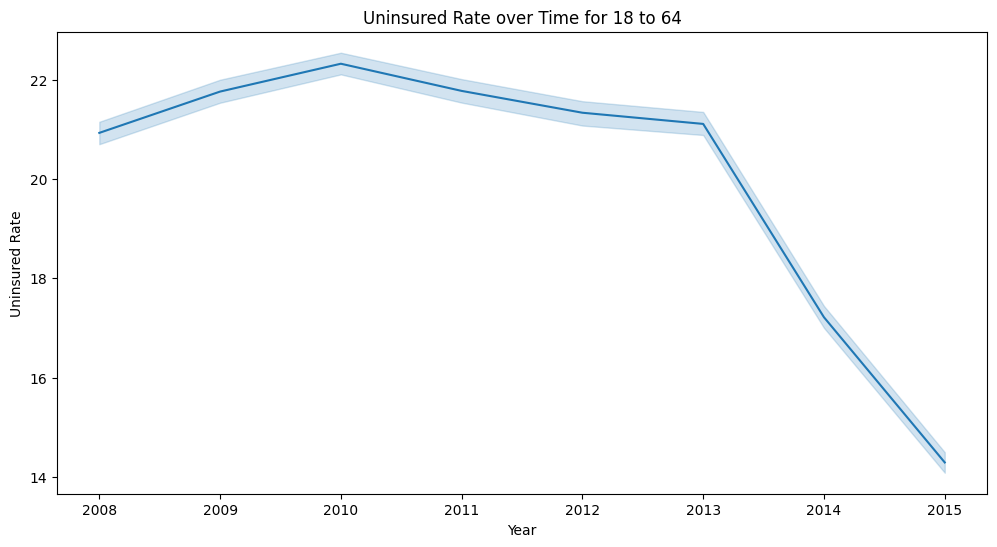

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='Uninsured_Rate_18to64')
plt.title('Uninsured Rate over Time for 18 to 64')
plt.xlabel('Year')
plt.ylabel('Uninsured Rate')
plt.show()

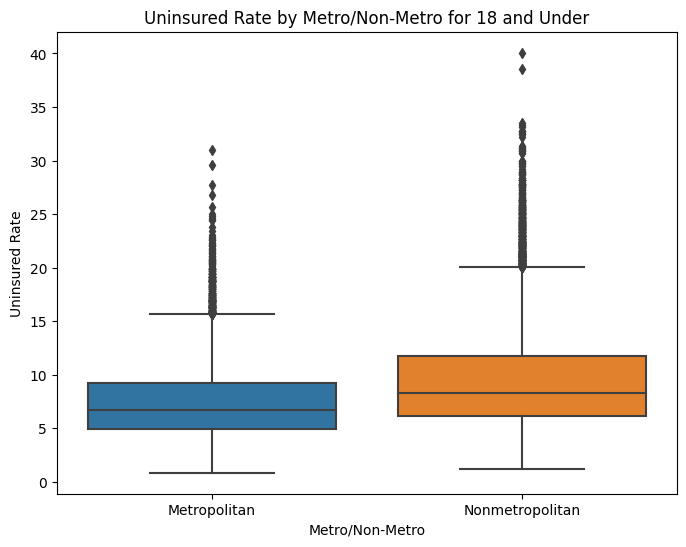

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='metro_nonmetro', y='Uninsured_Rate_18under')
plt.title('Uninsured Rate by Metro/Non-Metro for 18 and Under')
plt.xlabel('Metro/Non-Metro')
plt.ylabel('Uninsured Rate')
plt.show()

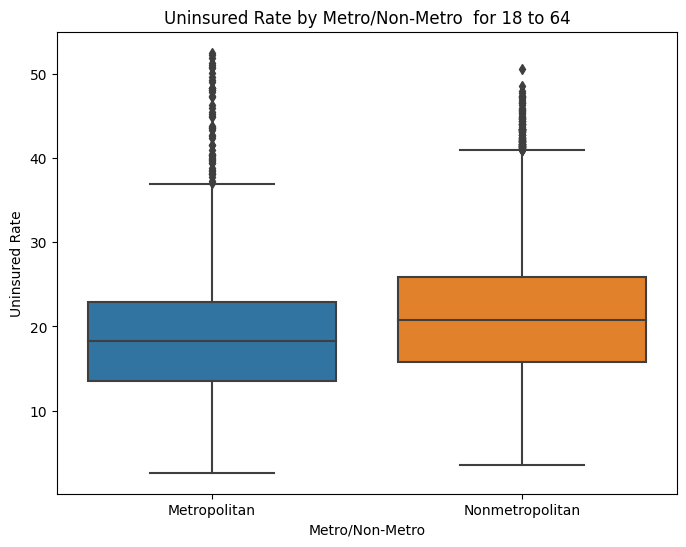

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='metro_nonmetro', y='Uninsured_Rate_18to64')
plt.title('Uninsured Rate by Metro/Non-Metro  for 18 to 64')
plt.xlabel('Metro/Non-Metro')
plt.ylabel('Uninsured Rate')
plt.show()

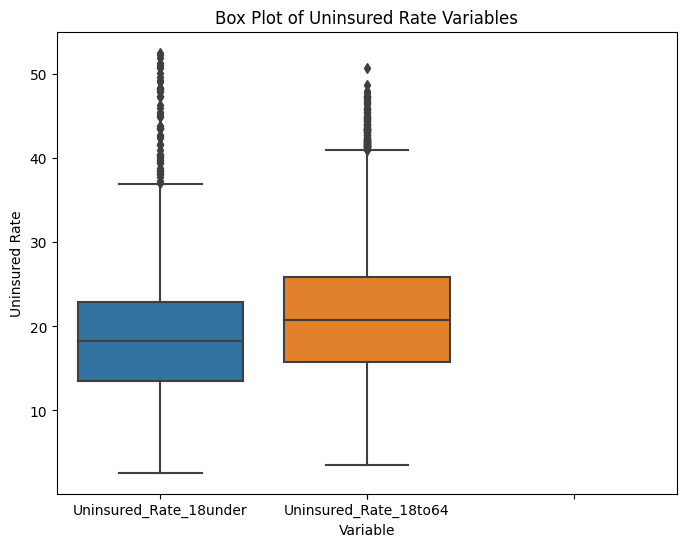

In [34]:
df_uninsured = merged_df[['Uninsured_Rate_18under','Uninsured_Rate_18to64']]

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='metro_nonmetro', y='Uninsured_Rate_18to64')
plt.boxplot(df_uninsured.values, labels=df_uninsured.columns)
plt.title('Box Plot of Uninsured Rate Variables')
plt.xlabel('Variable')
plt.ylabel('Uninsured Rate')
plt.show()


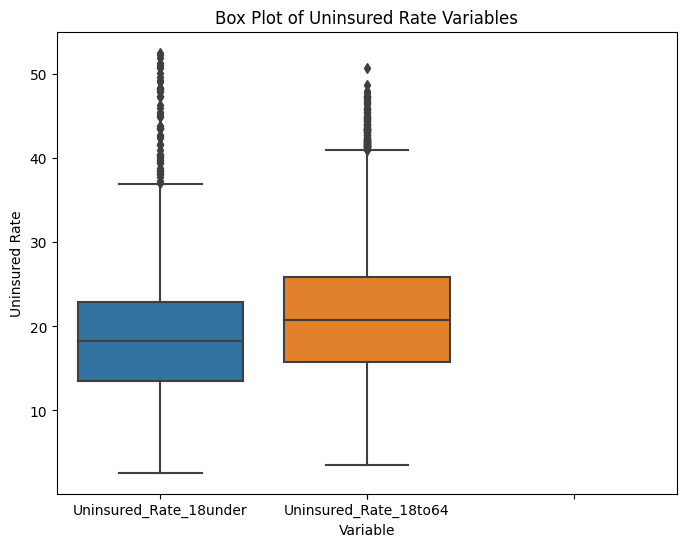

In [35]:
df_uninsured = merged_df[['Uninsured_Rate_18under','Uninsured_Rate_18to64']]

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='metro_nonmetro', y='Uninsured_Rate_18to64')
plt.boxplot(df_uninsured.values, labels=df_uninsured.columns)
plt.title('Box Plot of Uninsured Rate Variables')
plt.xlabel('Variable')
plt.ylabel('Uninsured Rate')
plt.show()


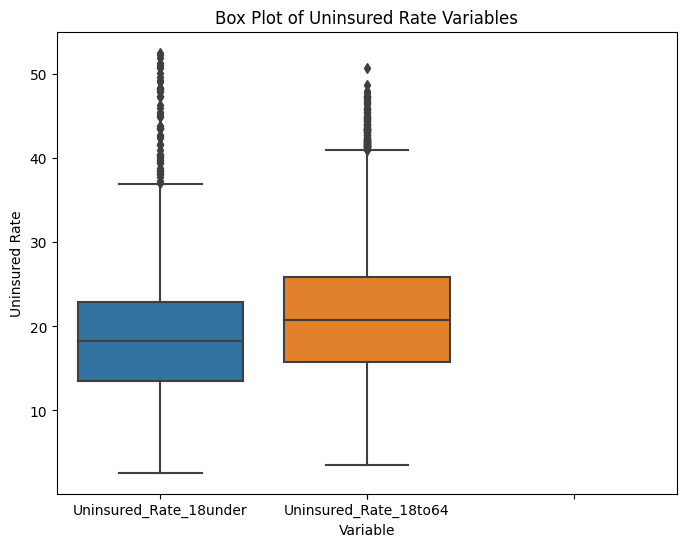

In [36]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='metro_nonmetro', y='Uninsured_Rate_18to64')
plt.boxplot(df_uninsured.values, labels=df_uninsured.columns)
plt.title('Box Plot of Uninsured Rate Variables')
plt.xlabel('Variable')
plt.ylabel('Uninsured Rate')
plt.show()

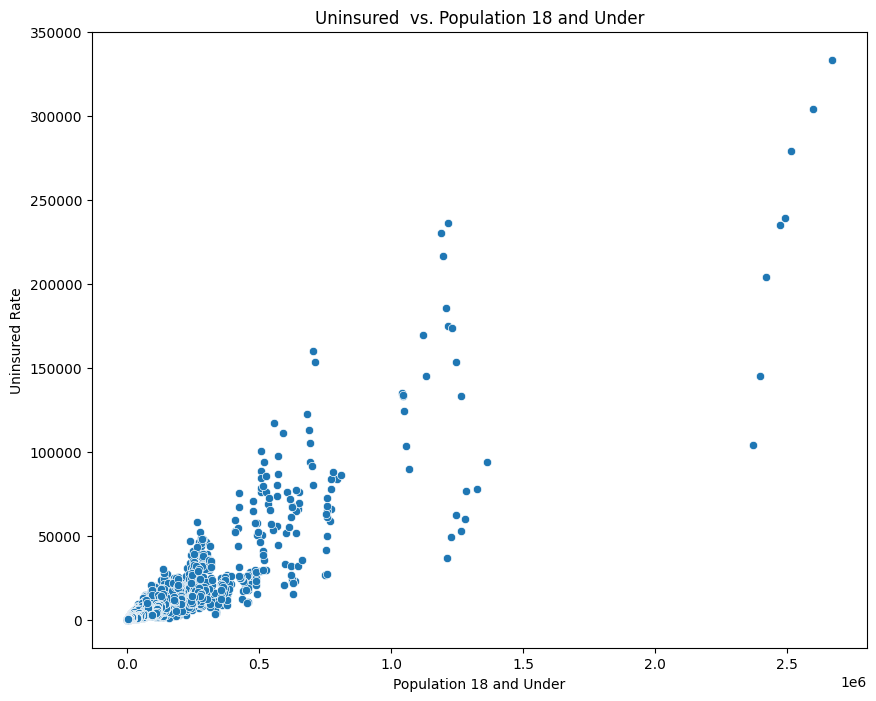

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='population_18under', y='uninsured_18under')
plt.title('Uninsured  vs. Population 18 and Under')
plt.xlabel('Population 18 and Under')
plt.ylabel('Uninsured Rate')
plt.show()

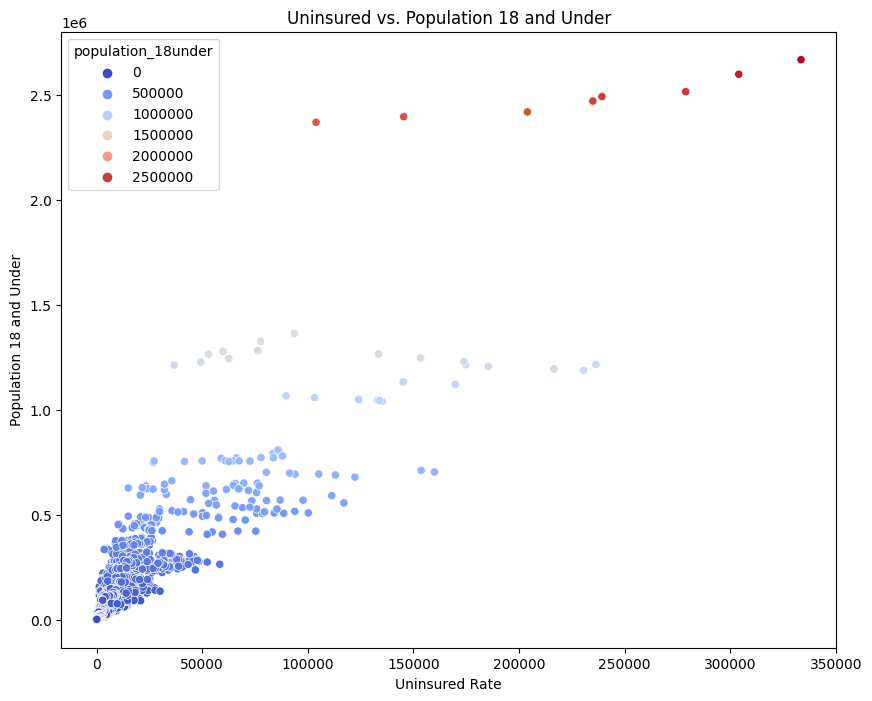

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='uninsured_18under', y='population_18under', hue='population_18under', palette='coolwarm')
plt.title('Uninsured vs. Population 18 and Under')
plt.ylabel('Population 18 and Under')
plt.xlabel('Uninsured Rate')
plt.show()

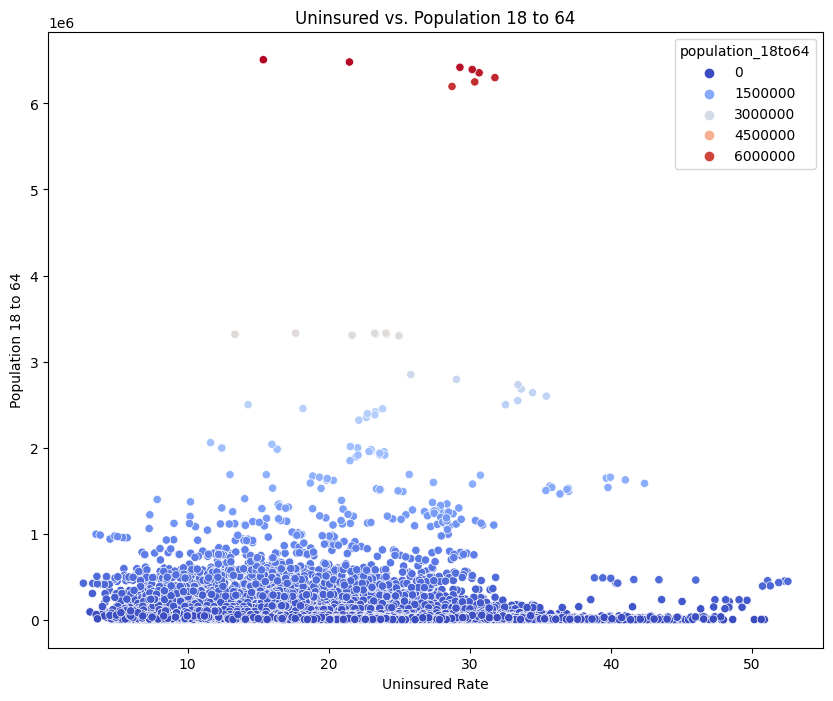

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='Uninsured_Rate_18to64', y='population_18to64', hue='population_18to64', palette='coolwarm')
plt.title('Uninsured vs. Population 18 to 64')
plt.ylabel('Population 18 to 64')
plt.xlabel('Uninsured Rate')
plt.show()

In [40]:
group =  merged_df[['Uninsured_Rate_18under','Uninsured_Rate_18to64']].groupby(merged_df['state_name']).mean()
group

,Uninsured_Rate_18under,Uninsured_Rate_18to64
state_name,,
Alabama,5.508396,20.303284
Alaska,16.262900,30.568874
Arizona,14.020667,22.455833
Arkansas,6.860250,23.871700
California,8.160474,20.431487
Colorado,12.366172,20.602168
Connecticut,3.692344,10.838594
Delaware,5.303750,13.327500
District of Columbia,2.933750,8.563750


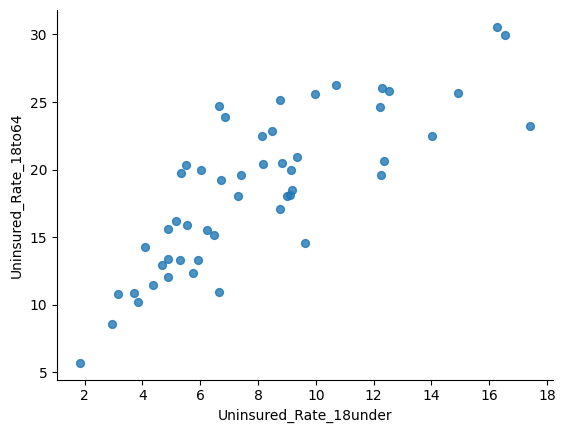

In [41]:
from matplotlib import pyplot as plt
group.plot(kind='scatter', x='Uninsured_Rate_18under', y='Uninsured_Rate_18to64', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

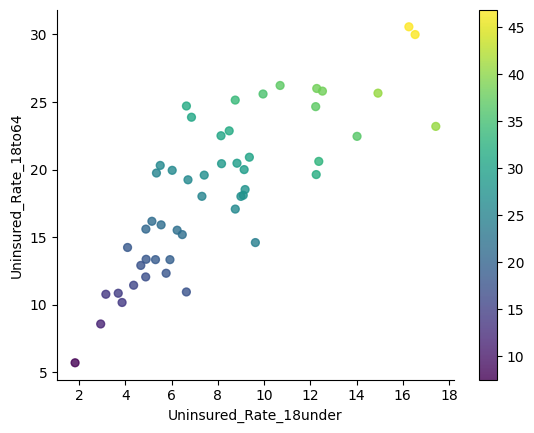

In [42]:
# Define the color variable
color_variable = group['Uninsured_Rate_18under'] + group['Uninsured_Rate_18to64']

# Create the scatter plot with color based on the color variable
group.plot(kind='scatter', x='Uninsured_Rate_18under', y='Uninsured_Rate_18to64', s=32, alpha=0.8, c=color_variable, cmap='viridis')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

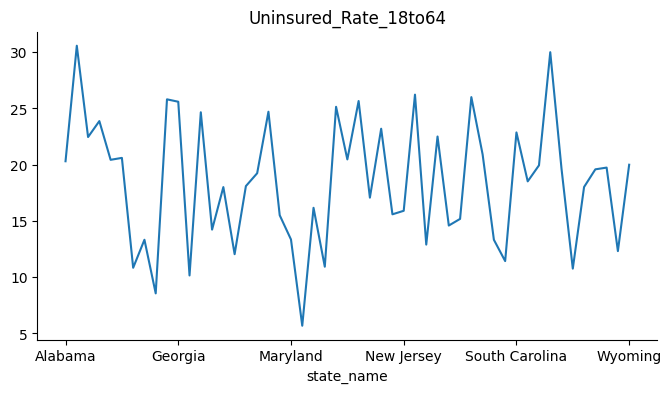

In [43]:
from matplotlib import pyplot as plt
group['Uninsured_Rate_18to64'].plot(kind='line', figsize=(8, 4), title='Uninsured_Rate_18to64')
plt.gca().spines[['top', 'right']].set_visible(False)

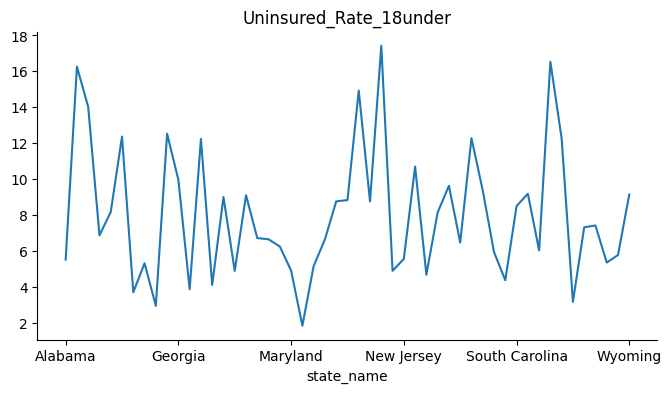

In [44]:
from matplotlib import pyplot as plt
group['Uninsured_Rate_18under'].plot(kind='line', figsize=(8, 4), title='Uninsured_Rate_18under')
plt.gca().spines[['top', 'right']].set_visible(False)

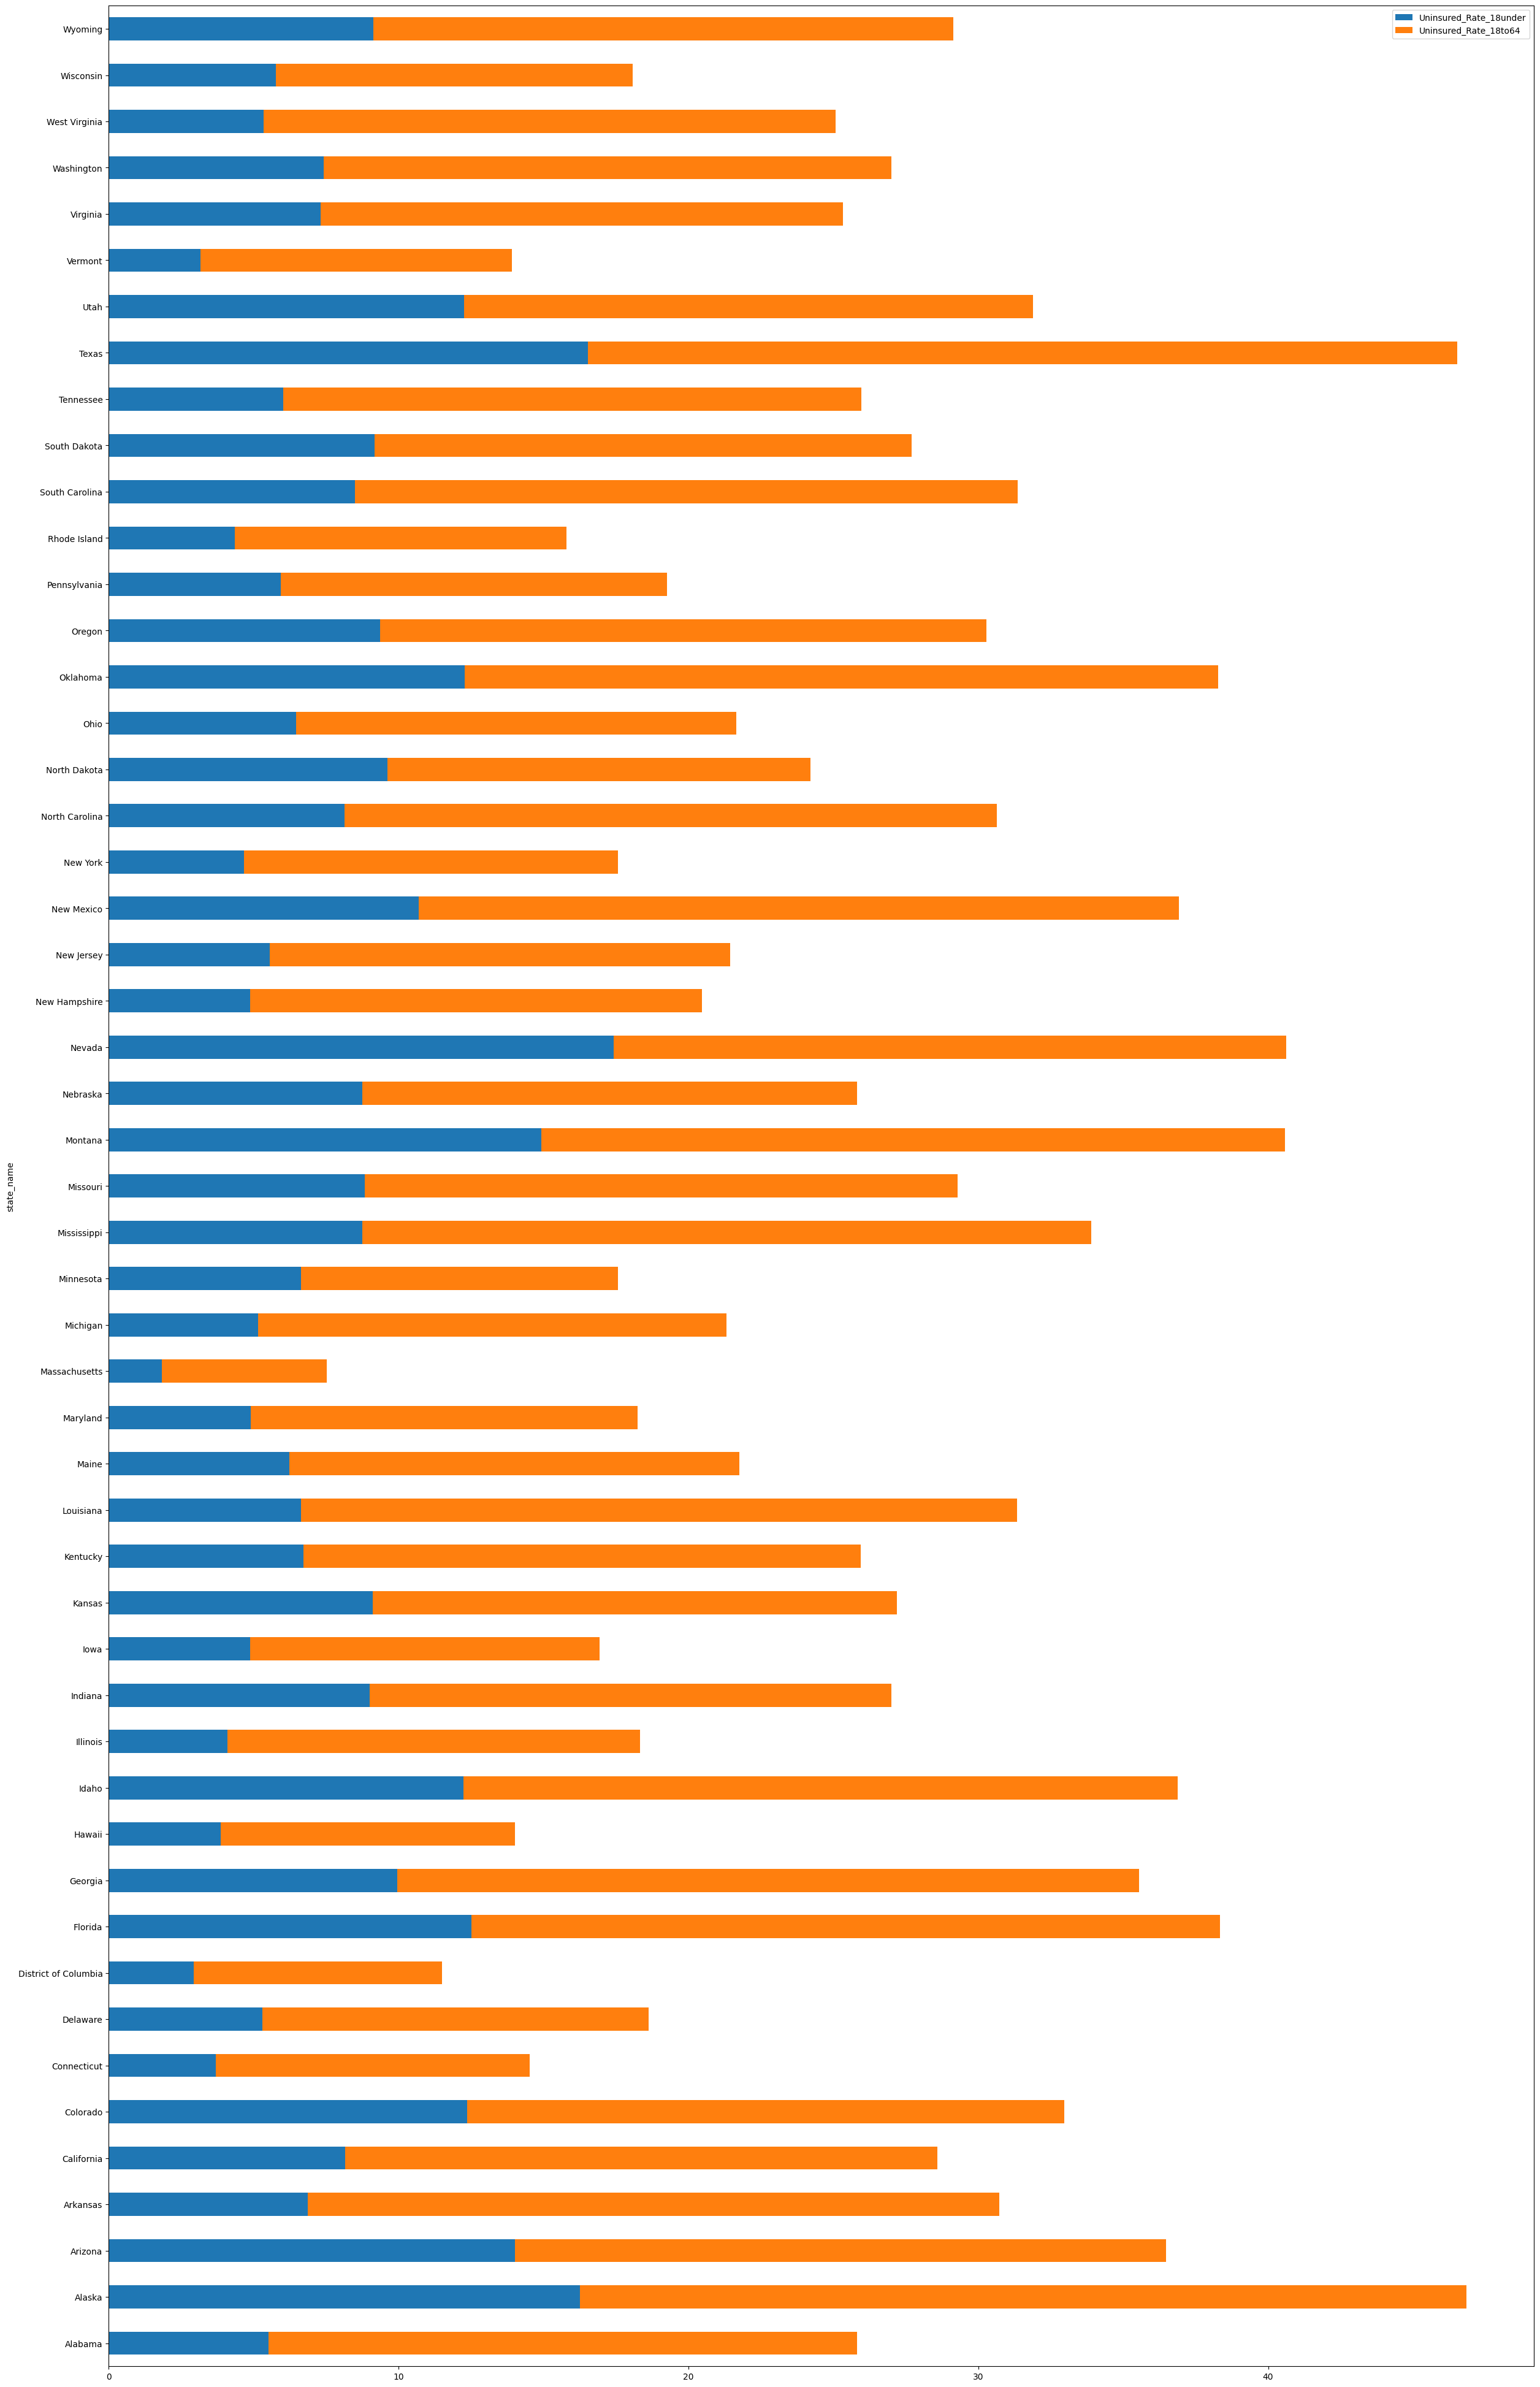

In [45]:
# Plot the bar chart
ax = group.plot(kind="barh", figsize=(30, 50), stacked=True)
plt.show()

In [46]:
# Find the maximum value and corresponding state name for 'Uninsured_Rate_18under'
max_18under = group['Uninsured_Rate_18under'].idxmax()
max_value_18under = group.loc[max_18under, 'Uninsured_Rate_18under']

# Find the minimum value and corresponding state name for 'Uninsured_Rate_18under'
min_18under = group['Uninsured_Rate_18under'].idxmin()
min_value_18under = group.loc[min_18under, 'Uninsured_Rate_18under']

# Find the maximum value and corresponding state name for 'Uninsured_Rate_18to64'
max_18to64 = group['Uninsured_Rate_18to64'].idxmax()
max_value_18to64 = group.loc[max_18to64, 'Uninsured_Rate_18to64']

# Find the minimum value and corresponding state name for 'Uninsured_Rate_18to64'
min_18to64 = group['Uninsured_Rate_18to64'].idxmin()
min_value_18to64 = group.loc[min_18to64, 'Uninsured_Rate_18to64']

# Print the results
print("Maximum Uninsured Rate 18under:")
print(f"State: {max_18under}, Value: {max_value_18under}")
print()
print("Minimum Uninsured Rate 18under:")
print(f"State: {min_18under}, Value: {min_value_18under}")
print()
print("Maximum Uninsured Rate 18to64:")
print(f"State: {max_18to64}, Value: {max_value_18to64}")
print()
print("Minimum Uninsured Rate 18to64:")
print(f"State: {min_18to64}, Value: {min_value_18to64}")

Maximum Uninsured Rate 18under:
State: Nevada, Value: 17.427279411764708

Minimum Uninsured Rate 18under:
State: Massachusetts, Value: 1.8259821428571428

Maximum Uninsured Rate 18to64:
State: Alaska, Value: 30.568874458874458

Minimum Uninsured Rate 18to64:
State: Massachusetts, Value: 5.689821428571428


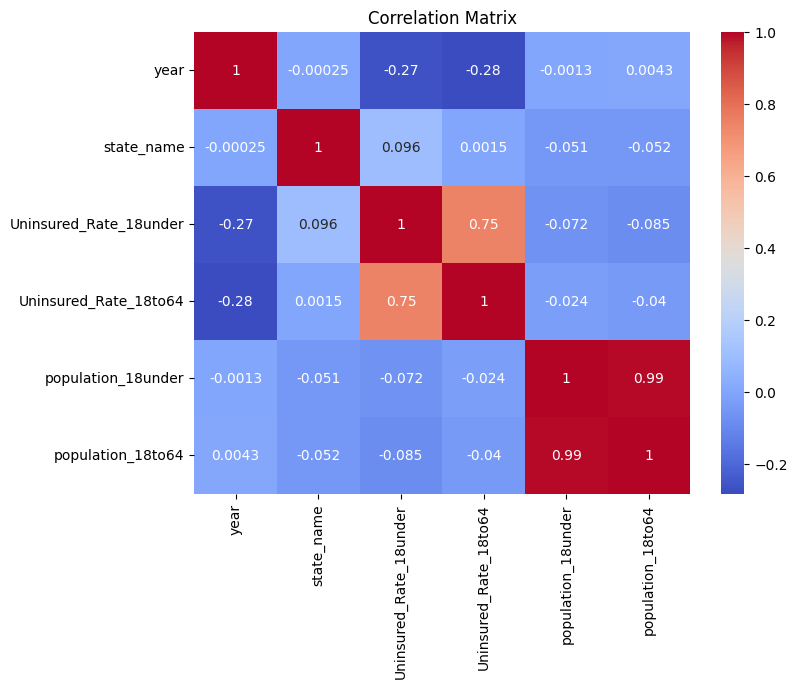

In [47]:
corr_matrix = df[['year','state_name','Uninsured_Rate_18under', 'Uninsured_Rate_18to64', 'population_18under', 'population_18to64']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [48]:
df = df.drop(['state_fips','county_fips','state_abbr'], axis=1)
print(df.columns)

Index(['county_name', 'state_name', 'metro_nonmetro', 'year', 'fips',
       'uninsured_18under', 'population_18under', 'uninsured_18to64',
       'population_18to64', 'Uninsured_Rate_18under', 'Uninsured_Rate_18to64'],
      dtype='object')


In [49]:
df['year'].unique()

array([2008, 2009, 2011, 2014, 2013, 2012, 2015, 2010])

In [50]:
df.dropna(inplace=True)

In [51]:
# % of missing.
print(df.isnull().sum())
# Check the data types of each column
print(df.dtypes)

county_name               0
state_name                0
metro_nonmetro            0
year                      0
fips                      0
uninsured_18under         0
population_18under        0
uninsured_18to64          0
population_18to64         0
Uninsured_Rate_18under    0
Uninsured_Rate_18to64     0
dtype: int64
county_name                 int64
state_name                  int64
metro_nonmetro              int64
year                        int64
fips                        int64
uninsured_18under           int64
population_18under          int64
uninsured_18to64            int64
population_18to64           int64
Uninsured_Rate_18under    float64
Uninsured_Rate_18to64     float64
dtype: object


In [52]:
model_df = df.drop(columns=['uninsured_18under','population_18under','uninsured_18to64','population_18to64','Uninsured_Rate_18to64'],axis=1)

Fit the model to a portion of the training set, test on the rest and evaluate

In [53]:
x_train,x_test,y_train,y_test=train_test_split(model_df.drop('Uninsured_Rate_18under',axis=1),model_df['Uninsured_Rate_18under'],test_size=0.20,random_state=42)

In [54]:
models=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(n_neighbors = 5),BaggingRegressor(),LinearSVR(),Lasso(),AdaBoostRegressor(),CatBoostRegressor()]
model_names=['DecisionTreeRegressor','LinearRegression','RandomForestRegressor','KNeighborsRegressor','BaggingRegressor','LinearSVR','Lasso','AdaBoostRegressor','CatBoostRegressor']
rmse=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    #rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))
d={'Modelling Algo':model_names,'RMSE':rmse}
d

Learning rate set to 0.065782
0:	learn: 4.2798520	total: 51.2ms	remaining: 51.2s
1:	learn: 4.1680359	total: 54.7ms	remaining: 27.3s
2:	learn: 4.0614734	total: 58.3ms	remaining: 19.4s
3:	learn: 3.9659722	total: 61.7ms	remaining: 15.4s
4:	learn: 3.8800481	total: 65.2ms	remaining: 13s
5:	learn: 3.8009319	total: 68.8ms	remaining: 11.4s
6:	learn: 3.7291290	total: 72.2ms	remaining: 10.2s
7:	learn: 3.6636750	total: 75.8ms	remaining: 9.39s
8:	learn: 3.6096570	total: 79.3ms	remaining: 8.74s
9:	learn: 3.5571479	total: 82.8ms	remaining: 8.2s
10:	learn: 3.5138673	total: 86.3ms	remaining: 7.76s
11:	learn: 3.4673084	total: 89.8ms	remaining: 7.4s
12:	learn: 3.4311094	total: 93.4ms	remaining: 7.09s
13:	learn: 3.3922435	total: 96.9ms	remaining: 6.82s
14:	learn: 3.3634148	total: 100ms	remaining: 6.59s
15:	learn: 3.3353939	total: 104ms	remaining: 6.38s
16:	learn: 3.3075730	total: 107ms	remaining: 6.21s
17:	learn: 3.2834081	total: 111ms	remaining: 6.05s
18:	learn: 3.2621292	total: 115ms	remaining: 5.92s
1

{'Modelling Algo': ['DecisionTreeRegressor',
  'LinearRegression',
  'RandomForestRegressor',
  'KNeighborsRegressor',
  'BaggingRegressor',
  'LinearSVR',
  'Lasso',
  'AdaBoostRegressor',
  'CatBoostRegressor'],
 'RMSE': [2.283677780531095,
  4.140513576562236,
  1.8398181112070409,
  1.9562874842177724,
  1.9001639412902218,
  9.287153339367904,
  4.287178561638074,
  4.362334983733901,
  1.8908226849013143]}

In [55]:
ans=pd.DataFrame(d)

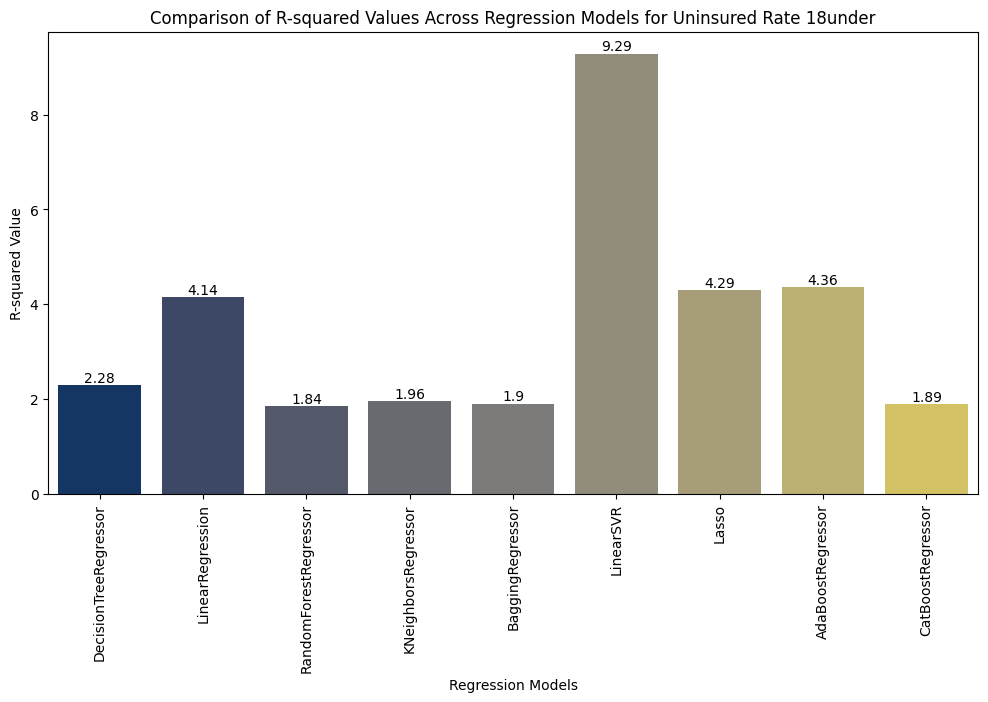

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ans['Modelling Algo'], y=ans['RMSE'], palette="cividis")
plt.title('Comparison of R-squared Values Across Regression Models for Uninsured Rate 18under')
plt.ylabel('R-squared Value')
plt.xlabel('Regression Models')
plt.xticks(rotation=90)

# Loop through the bars and add value labels
for i, v in enumerate(ans['RMSE']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# Show the plot
plt.show()


In [57]:
Test_df = df[df['year']>2014]

In [58]:
Test_df['year'].unique()

array([2015])

In [59]:
Test_df

,county_name,state_name,metro_nonmetro,year,fips,uninsured_18under,population_18under,uninsured_18to64,population_18to64,Uninsured_Rate_18under,Uninsured_Rate_18to64
6,82,0,0,2015,1001,371,14295,4102,33642,2.60,12.19
10,89,0,0,2015,1003,1523,46526,17437,118459,3.27,14.72
19,100,0,1,2015,1005,209,5751,2289,13154,3.63,17.40
30,150,0,0,2015,1007,151,4807,1890,12541,3.14,15.07
34,165,0,0,2015,1009,624,13899,6040,34126,4.49,17.70
...,...,...,...,...,...,...,...,...,...,...,...
25103,1637,50,1,2015,56037,885,12321,4087,27823,7.18,14.69
25110,1662,50,1,2015,56039,519,4482,2570,15698,11.58,16.37
25119,1715,50,1,2015,56041,451,6322,1825,12161,7.13,15.01
25125,1776,50,1,2015,56043,214,1985,943,4647,10.78,20.29


In [60]:
# Define the replacement mappings
replacement_dict = {2015: 2016}

# Replace the values in the 'year' column based on the defined mappings
Test_df['year'] = Test_df['year'].replace(replacement_dict)

In [61]:
Test_df['year'].unique()

array([2016])

In [62]:
Test_predict_df = Test_df.drop(columns=['uninsured_18under','population_18under','Uninsured_Rate_18under','uninsured_18to64','population_18to64','Uninsured_Rate_18to64'],axis=1)

In [63]:
Test_predict_df

,county_name,state_name,metro_nonmetro,year,fips
6,82,0,0,2016,1001
10,89,0,0,2016,1003
19,100,0,1,2016,1005
30,150,0,0,2016,1007
34,165,0,0,2016,1009
...,...,...,...,...,...
25103,1637,50,1,2016,56037
25110,1662,50,1,2016,56039
25119,1715,50,1,2016,56041
25125,1776,50,1,2016,56043


In [64]:
# % of missing.
print(Test_predict_df.isnull().sum())
# Check the data types of each column
print(Test_predict_df.dtypes)

county_name       0
state_name        0
metro_nonmetro    0
year              0
fips              0
dtype: int64
county_name       int64
state_name        int64
metro_nonmetro    int64
year              int64
fips              int64
dtype: object


In [65]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
Test_predict_df['Predicted_Uninsured_Rate_18under']=clf.predict(Test_predict_df)
print(Test_predict_df)

       county_name  state_name  metro_nonmetro  year   fips  \
6               82           0               0  2016   1001   
10              89           0               0  2016   1003   
19             100           0               1  2016   1005   
30             150           0               0  2016   1007   
34             165           0               0  2016   1009   
...            ...         ...             ...   ...    ...   
25103         1637          50               1  2016  56037   
25110         1662          50               1  2016  56039   
25119         1715          50               1  2016  56041   
25125         1776          50               1  2016  56043   
25133         1802          50               1  2016  56045   

       Predicted_Uninsured_Rate_18under  
6                                2.9146  
10                               3.1337  
19                               3.4774  
30                               3.1477  
34                               

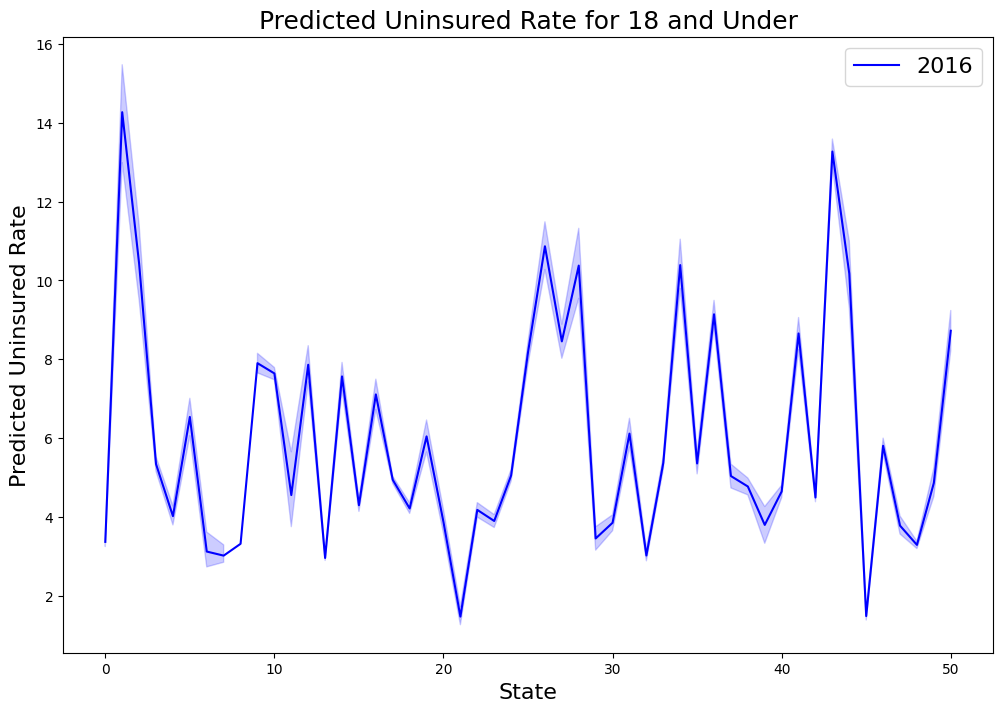

In [66]:
plt.figure(figsize=(12,8))
sns.lineplot(x=Test_predict_df['state_name'],y=Test_predict_df['Predicted_Uninsured_Rate_18under'], color = 'blue')

#plt.grid()
plt.legend(['2016'], loc='best', fontsize=16)
plt.title('Predicted Uninsured Rate for 18 and Under', fontsize=18)
plt.ylabel('Predicted Uninsured Rate', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.show()

In [67]:
model_df1 = df.drop(columns=['uninsured_18under','population_18under','uninsured_18to64','population_18to64','Uninsured_Rate_18under'],axis=1)

In [68]:
model_df1

,county_name,state_name,metro_nonmetro,year,fips,Uninsured_Rate_18to64
0,82,0,0,2008,1001,15.76
1,82,0,0,2009,1001,17.96
2,82,0,0,2011,1001,17.96
3,82,0,0,2014,1001,14.21
4,82,0,0,2013,1001,17.43
...,...,...,...,...,...,...
25136,1802,50,1,2008,56045,20.58
25137,1802,50,1,2013,56045,18.49
25138,1802,50,1,2011,56045,20.13
25139,1802,50,1,2009,56045,21.04


In [69]:
## Fit the model to a portion of the training set, test on the rest and evaluate

In [70]:
x_train,x_test,y_train,y_test=train_test_split(model_df1.drop('Uninsured_Rate_18to64',axis=1),model_df1['Uninsured_Rate_18to64'],test_size=0.20,random_state=42)

In [71]:
models=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(n_neighbors = 5),BaggingRegressor(),LinearSVR(),Lasso(),AdaBoostRegressor(),CatBoostRegressor()]
model_names=['DecisionTreeRegressor','LinearRegression','RandomForestRegressor','KNeighborsRegressor','BaggingRegressor','LinearSVR','Lasso','AdaBoostRegressor','CatBoostRegressor']
rmse=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    #rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))
d1={'Modelling Algo':model_names,'RMSE':rmse}
d1

Learning rate set to 0.065782
0:	learn: 6.8545441	total: 8.88ms	remaining: 8.87s
1:	learn: 6.6649745	total: 18.1ms	remaining: 9.04s
2:	learn: 6.5243816	total: 27.3ms	remaining: 9.08s
3:	learn: 6.3649376	total: 38.9ms	remaining: 9.69s
4:	learn: 6.2262521	total: 45.5ms	remaining: 9.05s
5:	learn: 6.1267939	total: 55.3ms	remaining: 9.15s
6:	learn: 6.0464079	total: 64.5ms	remaining: 9.14s
7:	learn: 5.9383740	total: 74.1ms	remaining: 9.19s
8:	learn: 5.8652464	total: 82.4ms	remaining: 9.07s
9:	learn: 5.7794058	total: 94.4ms	remaining: 9.35s
10:	learn: 5.7004240	total: 101ms	remaining: 9.04s
11:	learn: 5.6448605	total: 112ms	remaining: 9.26s
12:	learn: 5.5761990	total: 121ms	remaining: 9.2s
13:	learn: 5.5185632	total: 130ms	remaining: 9.13s
14:	learn: 5.4618901	total: 138ms	remaining: 9.08s
15:	learn: 5.4114669	total: 147ms	remaining: 9.04s
16:	learn: 5.3587335	total: 157ms	remaining: 9.06s
17:	learn: 5.3152222	total: 164ms	remaining: 8.95s
18:	learn: 5.2767654	total: 173ms	remaining: 8.93s
19

{'Modelling Algo': ['DecisionTreeRegressor',
  'LinearRegression',
  'RandomForestRegressor',
  'KNeighborsRegressor',
  'BaggingRegressor',
  'LinearSVR',
  'Lasso',
  'AdaBoostRegressor',
  'CatBoostRegressor'],
 'RMSE': [2.9889244862065483,
  6.65504636197237,
  2.4551498768138083,
  3.293505346356827,
  2.560081668928056,
  7.66436622006669,
  6.852356717417044,
  5.501153864432558,
  2.974316108959861]}

In [72]:
ans1=pd.DataFrame(d1)

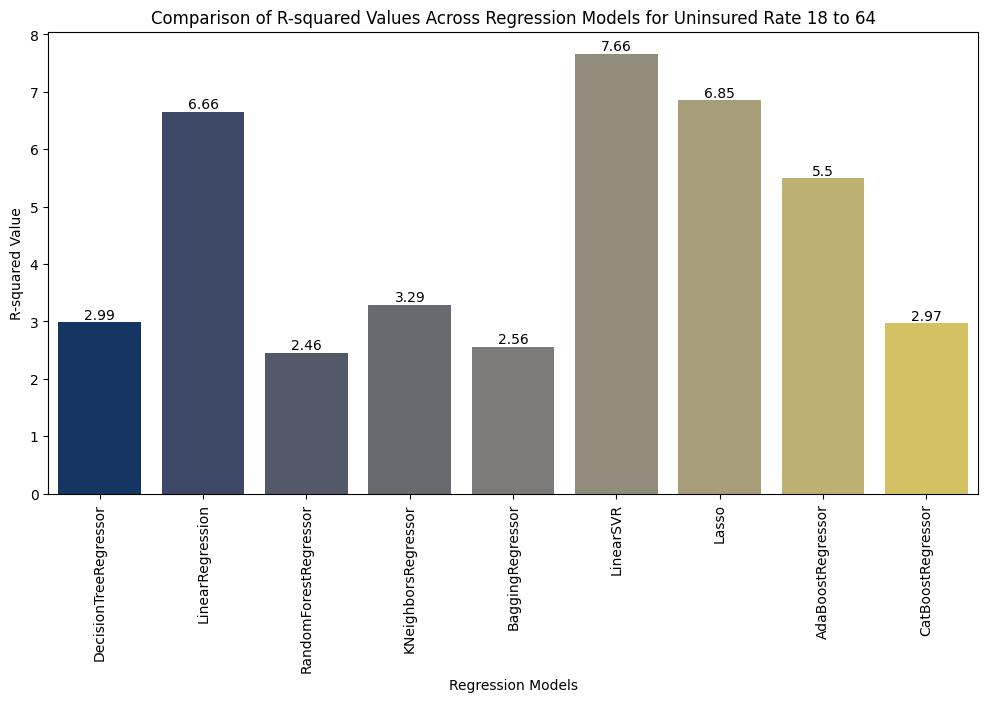

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ans1['Modelling Algo'], y=ans1['RMSE'], palette="cividis")
plt.title('Comparison of R-squared Values Across Regression Models for Uninsured Rate 18 to 64')
plt.ylabel('R-squared Value')
plt.xlabel('Regression Models')
plt.xticks(rotation=90)

# Loop through the bars and add value labels
for i, v in enumerate(ans1['RMSE']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# Show the plot
plt.show()


In [74]:
Test_df1 = df[df['year']>2014]

In [75]:
# Define the replacement mappings
replacement_dict = {2015: 2016}

# Replace the values in the 'year' column based on the defined mappings
Test_df1['year'] = Test_df1['year'].replace(replacement_dict)

In [76]:
Test_predict_df1 = Test_df1.drop(columns=['uninsured_18under','population_18under','Uninsured_Rate_18under','uninsured_18to64','population_18to64','Uninsured_Rate_18to64'],axis=1)

In [77]:
# % of missing.
print(Test_predict_df1.isnull().sum())
# Check the data types of each column
print(Test_predict_df1.dtypes)

county_name       0
state_name        0
metro_nonmetro    0
year              0
fips              0
dtype: int64
county_name       int64
state_name        int64
metro_nonmetro    int64
year              int64
fips              int64
dtype: object


In [78]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
Test_predict_df1['Predicted_Uninsured_Rate_18to64']=clf.predict(Test_predict_df1)
print(Test_predict_df1)

       county_name  state_name  metro_nonmetro  year   fips  \
6               82           0               0  2016   1001   
10              89           0               0  2016   1003   
19             100           0               1  2016   1005   
30             150           0               0  2016   1007   
34             165           0               0  2016   1009   
...            ...         ...             ...   ...    ...   
25103         1637          50               1  2016  56037   
25110         1662          50               1  2016  56039   
25119         1715          50               1  2016  56041   
25125         1776          50               1  2016  56043   
25133         1802          50               1  2016  56045   

       Predicted_Uninsured_Rate_18to64  
6                              13.2956  
10                             14.3835  
19                             17.3537  
30                             14.9223  
34                             15.3836

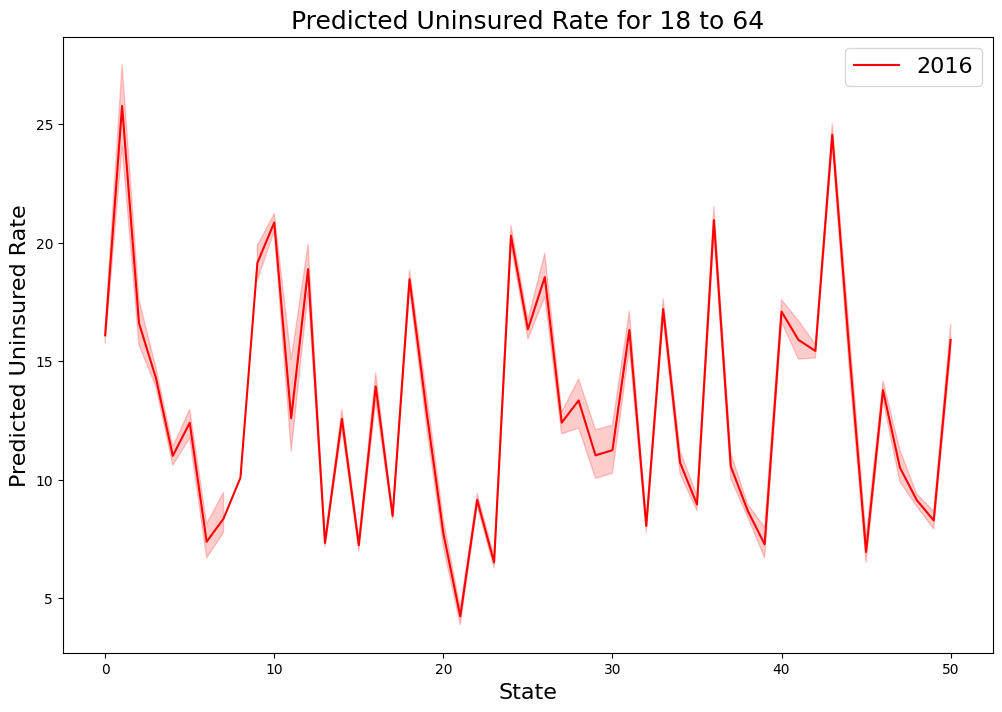

In [79]:
plt.figure(figsize=(12,8))
#sns.lineplot(x=data2016['state_name'],y=data2016['Predicted_Uninsured_Rate_18to64'], color = 'green')
sns.lineplot(x=Test_predict_df1['state_name'],y=Test_predict_df1['Predicted_Uninsured_Rate_18to64'], color = 'red')
#sns.lineplot(x=data2018['state_name'],y=data2018['Predicted_Uninsured_Rate_18to64'], color = 'blue')
#plt.grid()
plt.legend(['2016'], loc='best', fontsize=16)
plt.title('Predicted Uninsured Rate for 18 to 64', fontsize=18)
plt.ylabel('Predicted Uninsured Rate', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.show()